<a id="99"></a>
# Python 12 Assignment
### Purpose: To Investigate the Analysis of Text and Natural Lanugage Processing
<b>Program Sections</b>
<ul>
<li><a href = "#0">Donwload and Install Python Packages</a></li>
<li><a href = "#1">Import Python Packages</a></li>
<li><a href = "#2">Set Display</a></li>
<li><a href = "#3">Load the Data and Evaluate Fields</a></li>
<li><a href = "#4">Feature Cleansing and Engineering</a></li>    
<li><a href = "#5">Sentiment Analysis</a></li>
<li><a href = "#6">Vector Representation</a></li>
<li><a href = "#7">Random Forest Model Development</a></li>
<li><a href = "#8">Assignment Submission</a></li></ul>    

<a id="0"></a>
### Download and Install Python Packages
###### Only run this section one time
<a href = "#99">Top</a>

In [1]:
pip install gensim

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [4]:
# Code Block 0
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\Owner\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\Owner\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     C:\Users\Owner\AppData\Roaming\nltk_data...
[nltk_data]    |   Package biocreative_ppi is already up-to-date!
[nltk_data]    | Downloading package brown to
[nltk_data]    |     C:\Users\Owner\AppData\Roaming\nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package brown_tei to
[nltk_data]    |     C:\Users\Owner\AppData\Roaming\nltk_data...
[nltk_data]    |   Package brown_tei is already up-to-date!
[nltk_data]    | Downloading package cess_cat to
[nltk_data]    |     C:\Users\O

[nltk_data]    |   Package sentiwordnet is already up-to-date!
[nltk_data]    | Downloading package sentence_polarity to
[nltk_data]    |     C:\Users\Owner\AppData\Roaming\nltk_data...
[nltk_data]    |   Package sentence_polarity is already up-to-date!
[nltk_data]    | Downloading package shakespeare to
[nltk_data]    |     C:\Users\Owner\AppData\Roaming\nltk_data...
[nltk_data]    |   Package shakespeare is already up-to-date!
[nltk_data]    | Downloading package sinica_treebank to
[nltk_data]    |     C:\Users\Owner\AppData\Roaming\nltk_data...
[nltk_data]    |   Package sinica_treebank is already up-to-date!
[nltk_data]    | Downloading package smultron to
[nltk_data]    |     C:\Users\Owner\AppData\Roaming\nltk_data...
[nltk_data]    |   Package smultron is already up-to-date!
[nltk_data]    | Downloading package state_union to
[nltk_data]    |     C:\Users\Owner\AppData\Roaming\nltk_data...
[nltk_data]    |   Package state_union is already up-to-date!
[nltk_data]    | Downloading

True

<a id="1"></a>
### Import Python Packages
<a href = "#99">Top</a>

In [5]:
# Code Block 1
import numpy as np 
import pandas as pd 
import seaborn as sns

from matplotlib import pyplot as plt
from matplotlib import style

import string
from nltk.corpus import wordnet
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

from sklearn.feature_extraction.text import TfidfVectorizer

from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

from wordcloud import WordCloud

from sklearn import tree
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import auc, roc_curve, roc_auc_score

<a id="2"></a>
### Set Display
<a href = "#99">Top</a>

In [6]:
# Code Block 2
# Set display to show up to 100 columns in dataframe
pd.set_option('display.max_columns',100) 

# Set plot style
plt.style.use('seaborn')

<a id="3"></a>
### Load the Data and Evaluate Fields
<a href = "#99">Top</a>

In [7]:
# Code Block 3
# Read CSV file into dataframe
df_reviews = pd.read_csv("Hotel Reviews.csv",encoding="latin1")

In [8]:
# Code Block 4
# Get basic information about data and fields in file
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51574 entries, 0 to 51573
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Hotel Name               51574 non-null  object 
 1   Hotel Avg Rating         51574 non-null  float64
 2   Hotel Number of Reviews  51574 non-null  int64  
 3   Guest Positive Comments  51574 non-null  object 
 4   Guest Negative Comments  51574 non-null  object 
 5   Guest Rating             51574 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 2.4+ MB


In [9]:
# Code Block 5
# Look at data in dataframe
df_reviews.sample(10, random_state=42)

,Hotel Name,Hotel Avg Rating,Hotel Number of Reviews,Guest Positive Comments,Guest Negative Comments,Guest Rating
26474,The Rembrandt,8.5,1802,location very close to South Kensington under...,breakfast room was quite busy and crowdy,9.2
34325,Sofitel Paris Arc De Triomphe,8.8,825,Staff were amazing We were treated like royal...,No Negative,10.0
33476,Best Western Blue Tower Hotel,7.4,3869,Very comfortable wifi and tv in the room exce...,About 20 mins on the tram to the hotel but th...,8.3
4613,88 Studios,8.4,955,Nice clean hotel good location and friendly s...,No Negative,8.3
1793,The Piccadilly London West End,9.0,2298,Free room upgrade Friendly staff,Bar was shut due to refurb,10.0
11535,Hilton Vienna,8.0,3078,Position room staff,No free wifi in the room,9.2
9798,Golden Tulip Amsterdam West,8.5,7586,No Positive,The bed Two separate single beds instead of d...,8.8
12947,DoubleTree by Hilton London West End,8.3,1774,The staff were ever so friendly The hotel was...,I liked it all No issues,9.6
12618,H10 Cubik 4 Sup,9.3,1398,Breakfast area was very plesant nice variety ...,Mmmm can t think,10.0
14449,Hilton London Metropole,7.5,6977,The bed was huge and very comfortable We love...,The room was quite small and right opposite o...,8.8


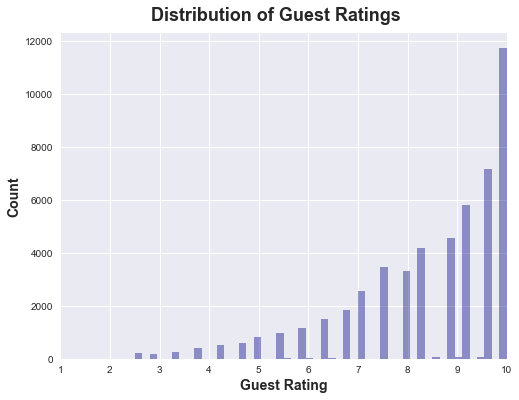

In [10]:
# Code Block 6
# Show distribution of guest ratings 
plt.figure(figsize=(8,6))
chart = sns.distplot(df_reviews["Guest Rating"], kde=False, color="navy")
plt.suptitle('Distribution of Guest Ratings', fontweight='bold', 
          fontsize='18', horizontalalignment='center', y=.94)
plt.xlim([1, 10])
plt.xlabel('Guest Rating', fontweight='bold', fontsize='14', ha='center')
plt.ylabel('Count', fontweight='bold', fontsize='14', ha='center')
plt.show()

In [11]:
# Code Block 7
# Split reviews into good and bad reviews by encoded dummy variable
df_reviews['Bad Review'] = df_reviews["Guest Rating"].apply(lambda x: 1 if x < 7 else 0)

# Look at number of reviews categorized in each
df_reviews['Bad Review'].value_counts()

0    42954
1     8620
Name: Bad Review, dtype: int64

<a id="4"></a>
### Feature Cleansing and Engineering
<a href = "#99">Top</a>

In [12]:
# Code Block 8
# Combine all positive and negative comments into a single comments field
df_reviews['Comments'] = df_reviews['Guest Positive Comments'] + ' ' + df_reviews['Guest Negative Comments']

In [13]:
# Code Block 9
# Remove 'No Negative' or 'No Positive' entries from comments
# These entries are automatic if nothing was written by reviewer
df_reviews['Comments'] = df_reviews['Comments'].apply(lambda x: x.replace("No Negative", "").replace("No Positive", ""))

In [14]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [15]:
# Code Block 10

# Define function to return word role (part of speech) in sentence
def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

# Tokenize, clean, tag, and lemmatize comments
def clean_text(text):
    # Lower text
    text = text.lower()
    # Tokenize text and remove puncutation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    # Remove words that contain numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    # Remove stop words
    stop = stopwords.words('english')
    text = [x for x in text if x not in stop]
    # Remove empty tokens
    text = [t for t in text if len(t) > 0]
    # Tag comments as word role using predefined function
    pos_tags = pos_tag(text)
    # Lemmatize text
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    # Remove words with only one letter
    text = [t for t in text if len(t) > 1]
    # Put all text in comments back together
    text = " ".join(text)
    return(text)

# Run comments through functions to clean and define text data
df_reviews['Comments Cleaned'] = df_reviews['Comments'].apply(lambda x: clean_text(x))

In [16]:
# Code Block 11
# Show comments and results of tokenization, cleansing, and Lemmatization
df_reviews[['Guest Positive Comments', 'Guest Negative Comments', 'Comments Cleaned']].sample(10, random_state=42)

,Guest Positive Comments,Guest Negative Comments,Comments Cleaned
26474,location very close to South Kensington under...,breakfast room was quite busy and crowdy,location close south kensington underground op...
34325,Staff were amazing We were treated like royal...,No Negative,staff amaze treat like royalty honeymoon
33476,Very comfortable wifi and tv in the room exce...,About 20 mins on the tram to the hotel but th...,comfortable wifi tv room excellent lot english...
4613,Nice clean hotel good location and friendly s...,No Negative,nice clean hotel good location friendly stuff
1793,Free room upgrade Friendly staff,Bar was shut due to refurb,free room upgrade friendly staff bar shut due ...
11535,Position room staff,No free wifi in the room,position room staff free wifi room
9798,No Positive,The bed Two separate single beds instead of d...,bed two separate single bed instead double bed
12947,The staff were ever so friendly The hotel was...,I liked it all No issues,staff ever friendly hotel great issue clean co...
12618,Breakfast area was very plesant nice variety ...,Mmmm can t think,breakfast area plesant nice variety food bread...
14449,The bed was huge and very comfortable We love...,The room was quite small and right opposite o...,bed huge comfortable love hotel bar restaurant...


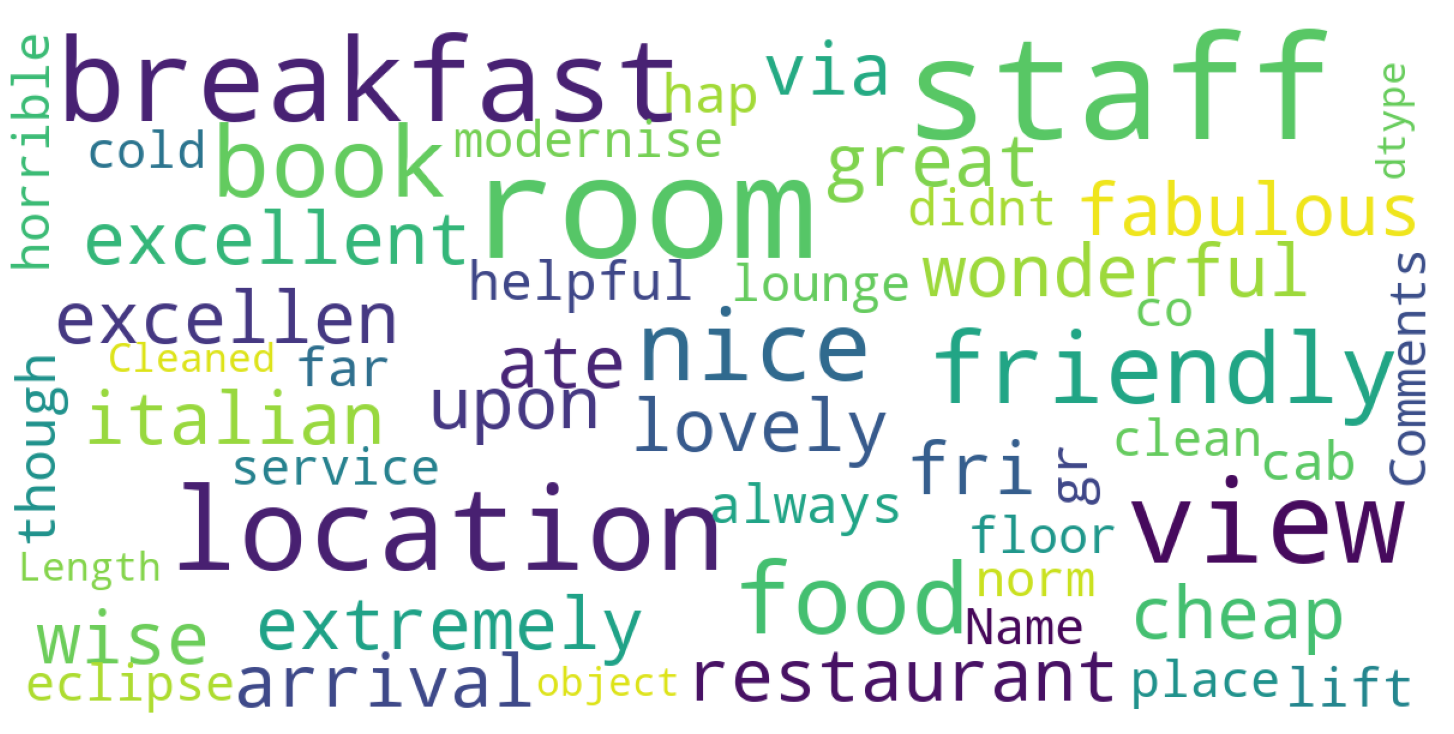

In [17]:
# Code Block 12
wordcloud = WordCloud(background_color = 'white',
                      max_words = 200, max_font_size = 40, scale = 3, 
                      random_state = 42).generate(str(df_reviews['Comments Cleaned']))
fig = plt.figure(1, figsize = (20, 20))
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show() 

In [18]:
# Code Block 13
# Create basic statistical measures on comments
# Calculate number of characters in comment
df_reviews["nb_chars"] = df_reviews["Comments Cleaned"].apply(lambda x: len(x))

# Calculate number of words in comment
df_reviews["nb_words"] = df_reviews["Comments Cleaned"].apply(lambda x: len(x.split(" ")))

<a id="5"></a>
### Sentiment Analysis
<a href = "#99">Top</a>

In [19]:
# Code Block 14
# Run Sentiment analysis on individual comments
sid = SentimentIntensityAnalyzer()
df_reviews["Sentiment"] = df_reviews['Comments Cleaned'].apply(lambda x: sid.polarity_scores(x))

# Concatenate sentiment scores to dataframe
df_reviews = pd.concat([df_reviews.drop(['Sentiment'], axis=1), df_reviews['Sentiment'].apply(pd.Series)], axis=1)

In [20]:
# Code Block 15
# Show comments and results of sentiment analysis
df_reviews[['Guest Positive Comments', 'Guest Negative Comments', 'pos', 'neu', 'neg', 'compound']].sample(10, random_state=42)

,Guest Positive Comments,Guest Negative Comments,pos,neu,neg,compound
26474,location very close to South Kensington under...,breakfast room was quite busy and crowdy,0.218,0.782,0.0,0.7070
34325,Staff were amazing We were treated like royal...,No Negative,0.744,0.256,0.0,0.8271
33476,Very comfortable wifi and tv in the room exce...,About 20 mins on the tram to the hotel but th...,0.399,0.601,0.0,0.9360
4613,Nice clean hotel good location and friendly s...,No Negative,0.795,0.205,0.0,0.8910
1793,Free room upgrade Friendly staff,Bar was shut due to refurb,0.481,0.519,0.0,0.7579
11535,Position room staff,No free wifi in the room,0.398,0.602,0.0,0.5106
9798,No Positive,The bed Two separate single beds instead of d...,0.000,1.000,0.0,0.0000
12947,The staff were ever so friendly The hotel was...,I liked it all No issues,0.703,0.297,0.0,0.9652
12618,Breakfast area was very plesant nice variety ...,Mmmm can t think,0.157,0.843,0.0,0.4215
14449,The bed was huge and very comfortable We love...,The room was quite small and right opposite o...,0.426,0.574,0.0,0.9524


In [21]:
# Code Block 16
# Show highest positive sentiment reviews (with more than 5 words)
pd.set_option('display.max_colwidth', 120)
df_reviews[df_reviews["nb_words"] >= 5].sort_values("pos", ascending = False)[["Comments", "pos"]].head(10)

,Comments,pos
7726,Warm friendly welcome staff cared that we were happy,0.938
33448,We loved Olivier He was amazing So kind and helpful,0.934
23618,Truly excellent staff very helpful and friendly,0.926
31969,Very welcoming staff friendly and helpful All good,0.922
18417,Clean nice and comfortable Staff is very nice,0.921
7397,Friendly Smiling Efficient Helpful staff,0.919
14264,Excellent welcome at check in Very friendly efficient Warm cookie was a welcome treat,0.910
35867,Excellent stay with a very warm welcome The staff are very friendly and happy to help,0.901
28236,lovely clean room staff was lovely jolly and happy,0.896
13660,Great location Clean safe comfortable friendly staff,0.890


In [22]:
# Code Block 17
# Show highest negative sentiment reviews (with more than 5 words)
df_reviews[df_reviews["nb_words"] >= 5].sort_values("neg", ascending = False)[["Comments", "neg"]].head(10)

,Comments,neg
15783,Noisy unpleasant staff poor room,0.798
2569,Nothing special The smile and the helper poy,0.762
15128,Poor staff Poor gym Poor room,0.756
24673,Broken windows Bad bugs on the bed,0.688
17319,the water wasn t pressurized and the shower was uncomfortable because of the water pressure,0.684
42546,Terrible claustrophobic room We felt cheated,0.681
32769,The hot water s pressure in the shower was too low Too low,0.681
13720,Everything Couldn t fault it No negative things to say,0.681
2398,terrible service in the bar and miserable breakfast,0.677
32674,breakfast and bed staff is terrible and some of them are arrogant,0.677


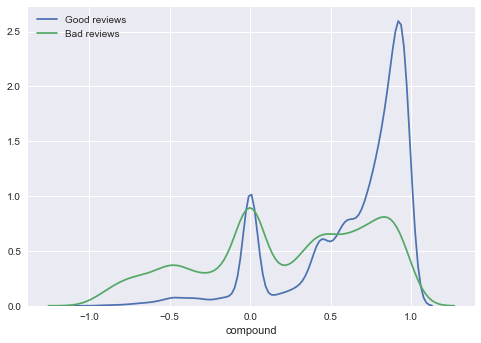

In [23]:
# Code Block 18
# Plot sentiment distribution for positive and negative reviews
for x in [0, 1]:
    subset = df_reviews[df_reviews['Bad Review'] == x]
    
    # Draw the density plot
    if x == 0:
        label = "Good reviews"
    else:
        label = "Bad reviews"
    sns.distplot(subset['compound'], hist = False, label = label)

<a id="6"></a>
### Vector Representation
<a href = "#99">Top</a>

In [24]:
# Code Block 19
# Extract vector representations for each comment

# create doc2vec vector columns
documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(df_reviews['Comments Cleaned'].apply(lambda x: x.split(" ")))]

# Train a Doc2Vec model with our comments
model = Doc2Vec(documents, vector_size=5, window=2, min_count=1, workers=4)

# Transform each document into vector data
doc2vec_df = df_reviews['Comments Cleaned'].apply(lambda x: model.infer_vector(x.split(" "))).apply(pd.Series)
doc2vec_df.columns = ["doc2vec_vector_" + str(x) for x in doc2vec_df.columns]
df_reviews = pd.concat([df_reviews, doc2vec_df], axis=1)

In [25]:
# Code Block 20
# Show results of vector representations
df_reviews[['Comments Cleaned', 'doc2vec_vector_0',
            'doc2vec_vector_1', 'doc2vec_vector_2',
            'doc2vec_vector_3', 'doc2vec_vector_4']].sample(10, random_state=42)

,Comments Cleaned,doc2vec_vector_0,doc2vec_vector_1,doc2vec_vector_2,doc2vec_vector_3,doc2vec_vector_4
26474,location close south kensington underground opposite victoria albert museum museum albert hall wifi work quite well ...,0.151335,-0.048168,0.051620,-0.141191,-0.042484
34325,staff amaze treat like royalty honeymoon,-0.039380,0.192640,0.075524,-0.031061,-0.019437
33476,comfortable wifi tv room excellent lot english channel coffee maker room nice addition room clean daily elevator flo...,0.030043,-0.083109,-0.063209,-0.071684,0.094355
4613,nice clean hotel good location friendly stuff,0.060841,-0.064028,0.041536,-0.109233,0.007792
1793,free room upgrade friendly staff bar shut due refurb,0.087133,-0.025408,0.059395,0.013089,0.067702
11535,position room staff free wifi room,-0.089313,-0.042749,0.074111,-0.054544,-0.046694
9798,bed two separate single bed instead double bed,0.036104,0.011618,0.152402,0.049546,-0.037225
12947,staff ever friendly hotel great issue clean comfortable would definitely come would recommend anyone liked issue,0.002658,0.189702,0.039501,-0.067527,0.035582
12618,breakfast area plesant nice variety food bread fruit tea coffe plus al carte cost mmmm think,0.351352,0.107022,0.146483,-0.108242,0.138196
14449,bed huge comfortable love hotel bar restaurant en suite bathroom lovely heat mirror bonus apply makeup room quite sm...,0.111607,0.002291,-0.028637,-0.153631,-0.030938


In [26]:
# Code Block 21
# Vectorize comments by word that show up in at least 10 comments
tfidf = TfidfVectorizer(min_df = 10)
tfidf_result = tfidf.fit_transform(df_reviews["Comments Cleaned"]).toarray()
tfidf_df = pd.DataFrame(tfidf_result, columns = tfidf.get_feature_names())
tfidf_df.columns = ["word_" + str(x) for x in tfidf_df.columns]
tfidf_df.index = df_reviews.index
df_reviews = pd.concat([df_reviews, tfidf_df], axis=1)

In [27]:
# Code Block 22
# Show word fields
df_reviews.filter(regex='^word_',axis=1).sample(10, random_state=42)

,word_abandon,word_abbey,word_abd,word_ability,word_abit,word_able,word_abrupt,word_absence,word_absolute,word_absolutely,word_ac,word_accept,word_acceptable,word_acces,word_access,word_accessibility,word_accessible,word_accessory,word_accident,word_accidentally,word_accommodate,word_accommodating,word_accommodation,word_accomodate,word_accomodating,word_accomodation,word_accompany,word_accor,word_accord,word_account,word_accurate,word_ace,word_ache,word_achieve,word_acknowledge,word_acoustic,word_across,word_act,word_action,word_activate,word_activity,word_actual,word_actually,word_ad,word_adapter,word_adaptor,word_add,word_added,word_addition,word_additional,...,word_within,word_without,word_woke,word_woken,word_woman,word_wonder,word_wonderful,word_wonderfull,word_wonderfully,word_wonderland,word_wont,word_wood,word_wooden,word_word,word_work,word_worked,word_worker,word_working,word_workman,word_workout,word_world,word_worn,word_worried,word_worry,word_worse,word_worst,word_worth,word_worthy,word_would,word_wouldnt,word_wow,word_wrap,word_write,word_wrong,word_xmas,word_xx,word_yard,word_year,word_yellow,word_yes,word_yet,word_yoghurt,word_yogurt,word_young,word_yummy,word_zero,word_ziggo,word_zone,word_zoo,word_zuid
26474,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.142092,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34325,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33476,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.270668,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.152632,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4613,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1793,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11535,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9798,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0

<a id="7"></a>
### Random Forest Model Development
<a href = "#99">Top</a>

In [28]:
# Code Block 23
# feature selection
target = 'Bad Review'
ignore_cols = [target, 'Hotel Name', 'Hotel Avg Rating', 'Hotel Number of Reviews',
               'Guest Positive Comments', 'Guest Negative Comments', 'Guest Rating',
               'Comments', 'Comments Cleaned']
features = [c for c in df_reviews.columns if c not in ignore_cols]

X_train, X_test, y_train, y_test = train_test_split(df_reviews[features], df_reviews[target], 
                                                    test_size = 0.20, random_state = 42)

In [29]:
# Code Block 24
# Train a random forest classifier
rf_reviews = RandomForestClassifier(n_estimators=100, n_jobs=-2, random_state=42)
rf_reviews.fit(X_train, y_train)

# show feature importance
feature_imp = pd.DataFrame({"Feature": features, "Feature Importance": rf_reviews.feature_importances_}).sort_values("Feature Importance", ascending = False)
feature_imp.head(20)

,Feature,Feature Importance
4,pos,0.039241
5,compound,0.038558
10,doc2vec_vector_4,0.025362
2,neg,0.025210
3,neu,0.023298
8,doc2vec_vector_2,0.021913
7,doc2vec_vector_1,0.018678
6,doc2vec_vector_0,0.017857
9,doc2vec_vector_3,0.016469
0,nb_chars,0.015716


In [30]:
# Code Block 25
# Calculate ROC and AUC statistics
y_pred = [x[1] for x in rf_reviews.predict_proba(X_test)]
random_forest_fpr, random_forest_tpr, thresholds = roc_curve(y_test, y_pred, pos_label = 1)
random_forest_auc = auc(random_forest_fpr, random_forest_tpr)

<a id="8"></a>
### Assignment Submission
<a href = "#99">Top</a>

## Python Assignment 12
### Name: George Gannon

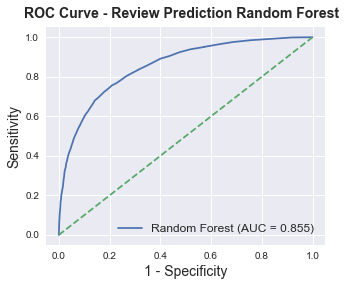

In [31]:
plt.figure(figsize = (5,4))
plt.suptitle('ROC Curve - Review Prediction Random Forest', fontweight='bold', fontsize=14, y=.95)
plt.plot(random_forest_fpr, random_forest_tpr, label='Random Forest (AUC = {:.3f})'.format(random_forest_auc))
plt.plot([0,1], [0,1], linestyle='--')
plt.xlim([-0.05, 1.05]); plt.ylim([-0.05, 1.05])
plt.xlabel('1 - Specificity', fontsize=14); plt.ylabel('Sensitivity', fontsize=14)
plt.legend(loc="lower right", frameon=False, fontsize=12); plt.show()

In [32]:
import datetime, socket
print(datetime.datetime.now().isoformat())
print("Your Computer Name is: " + socket.gethostname())
print("Your Computer IP Address is: " + socket.gethostbyname(socket.gethostname()))

2020-11-24T15:52:59.899921
Your Computer Name is: DESKTOP-0VRDGNF
Your Computer IP Address is: 192.168.1.139
